In [57]:
# %pip install plotly
# %pip install mlxtend
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from mlxtend.preprocessing import TransactionEncoder
# https://www.kaggle.com/code/evrenermis/association-rule-based-learning-explained/notebook

In [58]:
data = pd.read_csv("basket.csv", header=None)
datashape = data.shape
datashape

(14964, 11)

In [59]:
#Checkout the data.

data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9,10
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#Analyse the data
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,14964,14964,4884,2186,796,452,277,197,52,2,2
unique,166,166,155,147,127,102,89,73,36,2,2
top,whole milk,whole milk,whole milk,whole milk,whole milk,shopping bags,yogurt,whole milk,shopping bags,9,10
freq,1083,983,244,111,39,25,19,14,4,1,1


In [61]:
data[1]

0                         1
1                    pastry
2                whole milk
3        pickled vegetables
4           misc. beverages
                ...        
14959    whipped/sour cream
14960                 herbs
14961                onions
14962      other vegetables
14963       root vegetables
Name: 1, Length: 14964, dtype: object

In [62]:
def GetBasketItemsinArray():
    basketItems = []
    # adding all items to the array without the header and index
    for i in range(1,datashape[0]):
        for j in range(1, datashape[1]):
            item = data.values[i,j]
            basketItems.append(item)
    return basketItems



In [63]:
basketItems = GetBasketItemsinArray()
print(basketItems)

['pastry', 'salty snack', nan, nan, nan, nan, nan, nan, nan, nan, 'whole milk', 'semi-finished bread', 'yogurt', nan, nan, nan, nan, nan, nan, nan, 'pickled vegetables', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'misc. beverages', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'hygiene articles', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'whole milk', 'rolls/buns', nan, nan, nan, nan, nan, nan, nan, nan, 'soda', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'soda', 'whipped/sour cream', nan, nan, nan, nan, nan, nan, nan, nan, 'curd', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'white bread', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'whole milk', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'other vegetables', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'sugar', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'specialty chocolate', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'dental care', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'rolls/buns', nan, nan, nan, nan, nan, nan, na

In [64]:
df = pd.DataFrame(basketItems,columns=["items"])
df["frequencyBought"] = 1
df.head

<bound method NDFrame.head of               items  frequencyBought
0            pastry                1
1       salty snack                1
2               NaN                1
3               NaN                1
4               NaN                1
...             ...              ...
149625          NaN                1
149626          NaN                1
149627          NaN                1
149628          NaN                1
149629          NaN                1

[149630 rows x 2 columns]>

In [65]:
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

df = df.groupby("items").sum().sort_values("frequencyBought", ascending=False).reset_index()
df.head()

,items,frequencyBought
0,whole milk,1419
1,rolls/buns,1104
2,other vegetables,1058
3,soda,985
4,yogurt,926


In [66]:
top20Items = df["items"].head(20).values
basketItemsRowinArray = []

# convert the row into string array of  items as values
for i in range(data.shape[0]):
    basketItemsRowinArray.append(str(data.values[i]))

basketItemsRowinArray = np.array(basketItemsRowinArray)              

In [67]:
items = []
for j in range(1,len(basketItemsRowinArray)):
    item =[]
    for i in range(len(top20Items)):    
        item.append(int(top20Items[i] in basketItemsRowinArray[j]))
    items.append(item)

df_top20_multiple_record_check =  pd.DataFrame(items,columns=top20Items)
df_top20_multiple_record_check.head()
    

,whole milk,rolls/buns,other vegetables,soda,yogurt,bottled water,shopping bags,pastry,root vegetables,whipped/sour cream,newspapers,domestic eggs,bottled beer,brown bread,fruit/vegetable juice,margarine,butter,tropical fruit,curd,canned beer
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
#Analyse the data
df_top20_multiple_record_check.describe()

,whole milk,rolls/buns,other vegetables,soda,yogurt,bottled water,shopping bags,pastry,root vegetables,whipped/sour cream,newspapers,domestic eggs,bottled beer,brown bread,fruit/vegetable juice,margarine,butter,tropical fruit,curd,canned beer
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,0.157923,0.110005,0.122101,0.097106,0.085879,0.060683,0.047584,0.051728,0.069572,0.043708,0.038896,0.037091,0.045312,0.037626,0.034017,0.032213,0.052062,0.067767,0.036691,0.046916
std,0.364681,0.312906,0.327414,0.296112,0.280194,0.238756,0.212892,0.221484,0.254432,0.204451,0.193353,0.188992,0.207994,0.190297,0.181280,0.176571,0.222159,0.251354,0.188007,0.211465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
#Create visualization of the first prefered product , second prefered etc
def GetPreferedItemChoicesBasedOnGivenIndex(choiceIndex, topNumber):
    basketItems = []
    # adding all items to the array without the header and index
    for i in range(1,datashape[0]):
        for j in range(1, datashape[1]):
            item = data.values[i,choiceIndex]
            basketItems.append(item)

    basketItems = np.array(basketItems)

    df_first = pd.DataFrame(basketItems,columns=["items"])
    df_first["frequencyBought"] = 1

    indexNames = df_first[df_first['items'] == "nan" ].index
    df_first.drop(indexNames , inplace=True)

    df_first = df_first.groupby("items").sum().sort_values("frequencyBought", ascending=False).reset_index()
    df_first.head()
    df_first["food"] = "food"
    df_first=df_first.truncate(before=-1, after=topNumber)
    return df_first

In [70]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import networkx as nx
plt.style.use('default')
def VisualizeChoiceBasketItems(itemsDataFrame):
    plt.rcParams['figure.figsize'] = (7, 7)
    first_choice = nx.from_pandas_edgelist(itemsDataFrame, source = 'food', target = "items", edge_attr = True)
    pos = nx.spring_layout(first_choice)
    nx.draw_networkx_nodes(first_choice, pos, node_size = 5000, node_color = "lavender")
    nx.draw_networkx_edges(first_choice, pos, width = 2, alpha = 0.6, edge_color = 'black')
    nx.draw_networkx_labels(first_choice, pos, font_size = 8, font_family = 'sans-serif')
    plt.axis('off')
    plt.grid()
    plt.title('Top 15 First Choices', fontsize = 25)
    plt.show()


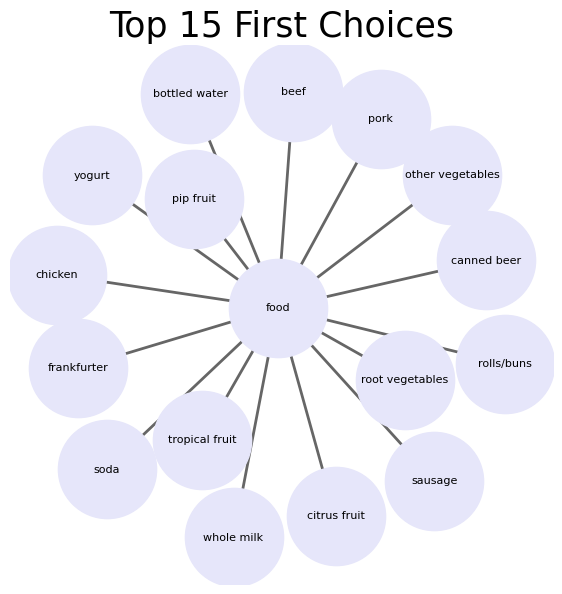

In [71]:
#Get dataframe of first Selection which is available in index 1
df_first_15 = GetPreferedItemChoicesBasedOnGivenIndex(0,15)

VisualizeChoiceBasketItems(df_first_15)


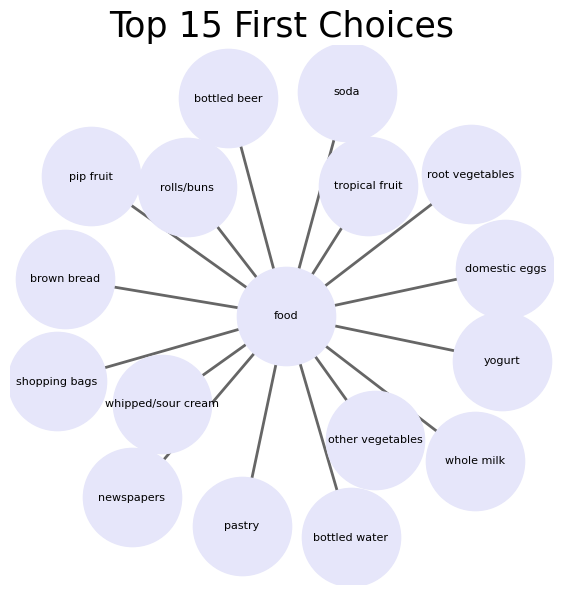

In [72]:
#Get dataframe of second Selection which is available in index 2
df_second_15 = GetPreferedItemChoicesBasedOnGivenIndex(1,15)

VisualizeChoiceBasketItems(df_second_15)

In [73]:
df_third_15 = GetPreferedItemChoicesBasedOnGivenIndex(2,15)

In [74]:

fig = go.Figure(data=[go.Bar(x=df_third_15["items"], y=df_third_15["frequencyBought"],
            hovertext=df_third_15["items"], text=df_third_15["frequencyBought"], textposition="outside")])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.65)
fig.update_layout(title_text="Customers' Third Choices", template="plotly_dark")
fig.show()

In [95]:
basketItems = []
for i in range(1,data.shape[0]):
    basketItem = [str(data.values[i,j]) for j in range(data.shape[1])]
    basketItems.append(basketItem)
    
basketItems = np.array(basketItems)
basketItems



array([['whole milk', 'pastry', 'salty snack', ..., 'nan', 'nan', 'nan'],
       ['sausage', 'whole milk', 'semi-finished bread', ..., 'nan',
        'nan', 'nan'],
       ['soda', 'pickled vegetables', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['fruit/vegetable juice', 'onions', 'nan', ..., 'nan', 'nan',
        'nan'],
       ['bottled beer', 'other vegetables', 'nan', ..., 'nan', 'nan',
        'nan'],
       ['soda', 'root vegetables', 'semi-finished bread', ..., 'nan',
        'nan', 'nan']], dtype='<U25')

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(basketItems).transform(basketItems)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset
basketItems